In [5]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/lokeshchahar/Desktop/Hachathon/ideathon hackathon/dataset/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df['Potability']=df['Potability'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


In [6]:
df = df.drop(['Chloramines', 'Sulfate','Organic_carbon','Trihalomethanes'], axis=1)

In [7]:
df.head()

,ph,Hardness,Solids,Conductivity,Turbidity,Potability
0,NaN,204.890455,20791.318981,564.308654,2.963135,0
1,3.716080,129.422921,18630.057858,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,398.410813,4.075075,0


In [8]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


From the above table, we can see that the count of each feature are not same. so there must me some null values.
Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high.
However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [9]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [10]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

In [11]:
# Checking for missing values
df[df['Potability']==0].isnull().sum()

ph              314
Hardness          0
Solids            0
Conductivity      0
Turbidity         0
Potability        0
dtype: int64

In [12]:
df[df['Potability']==1].isnull().sum()

ph              177
Hardness          0
Solids            0
Conductivity      0
Turbidity         0
Potability        0
dtype: int64

In [13]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))

/var/folders/v8/7sm4tkys03j44j2vkrx2myy00000gn/T/ipykernel_1019/2781401491.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))


In [14]:
df.isnull().sum()

ph              0
Hardness        0
Solids          0
Conductivity    0
Turbidity       0
Potability      0
dtype: int64

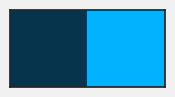

In [15]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

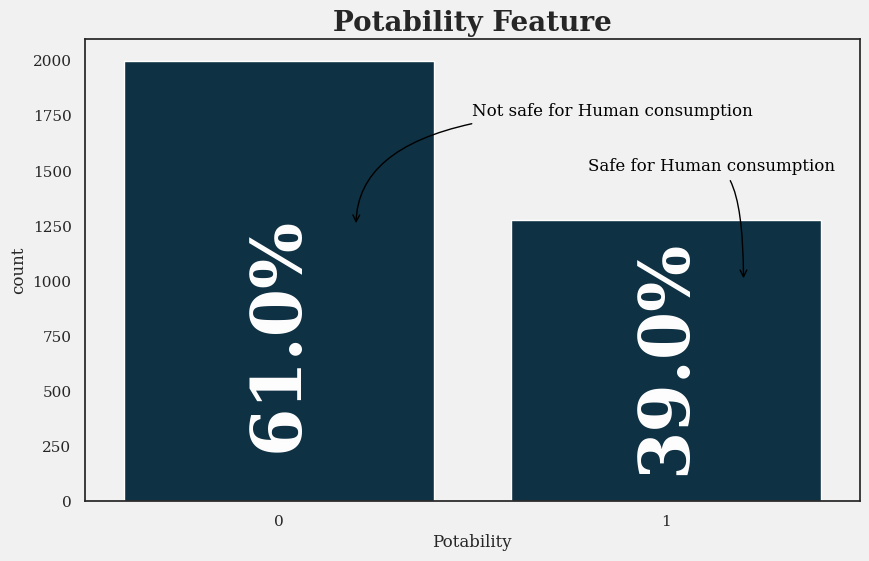

In [16]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

There is imbalance in the Target variable. which should be considered for modeling

Based on the approved limit, we can clearly see the difference in the water classification. Ex: distribution of non potable water is high on conductivity compared to potable water. same applicable to Turbidity.
But, presence doesn't show significant difference. I hope the hypothetical testing can help us here.

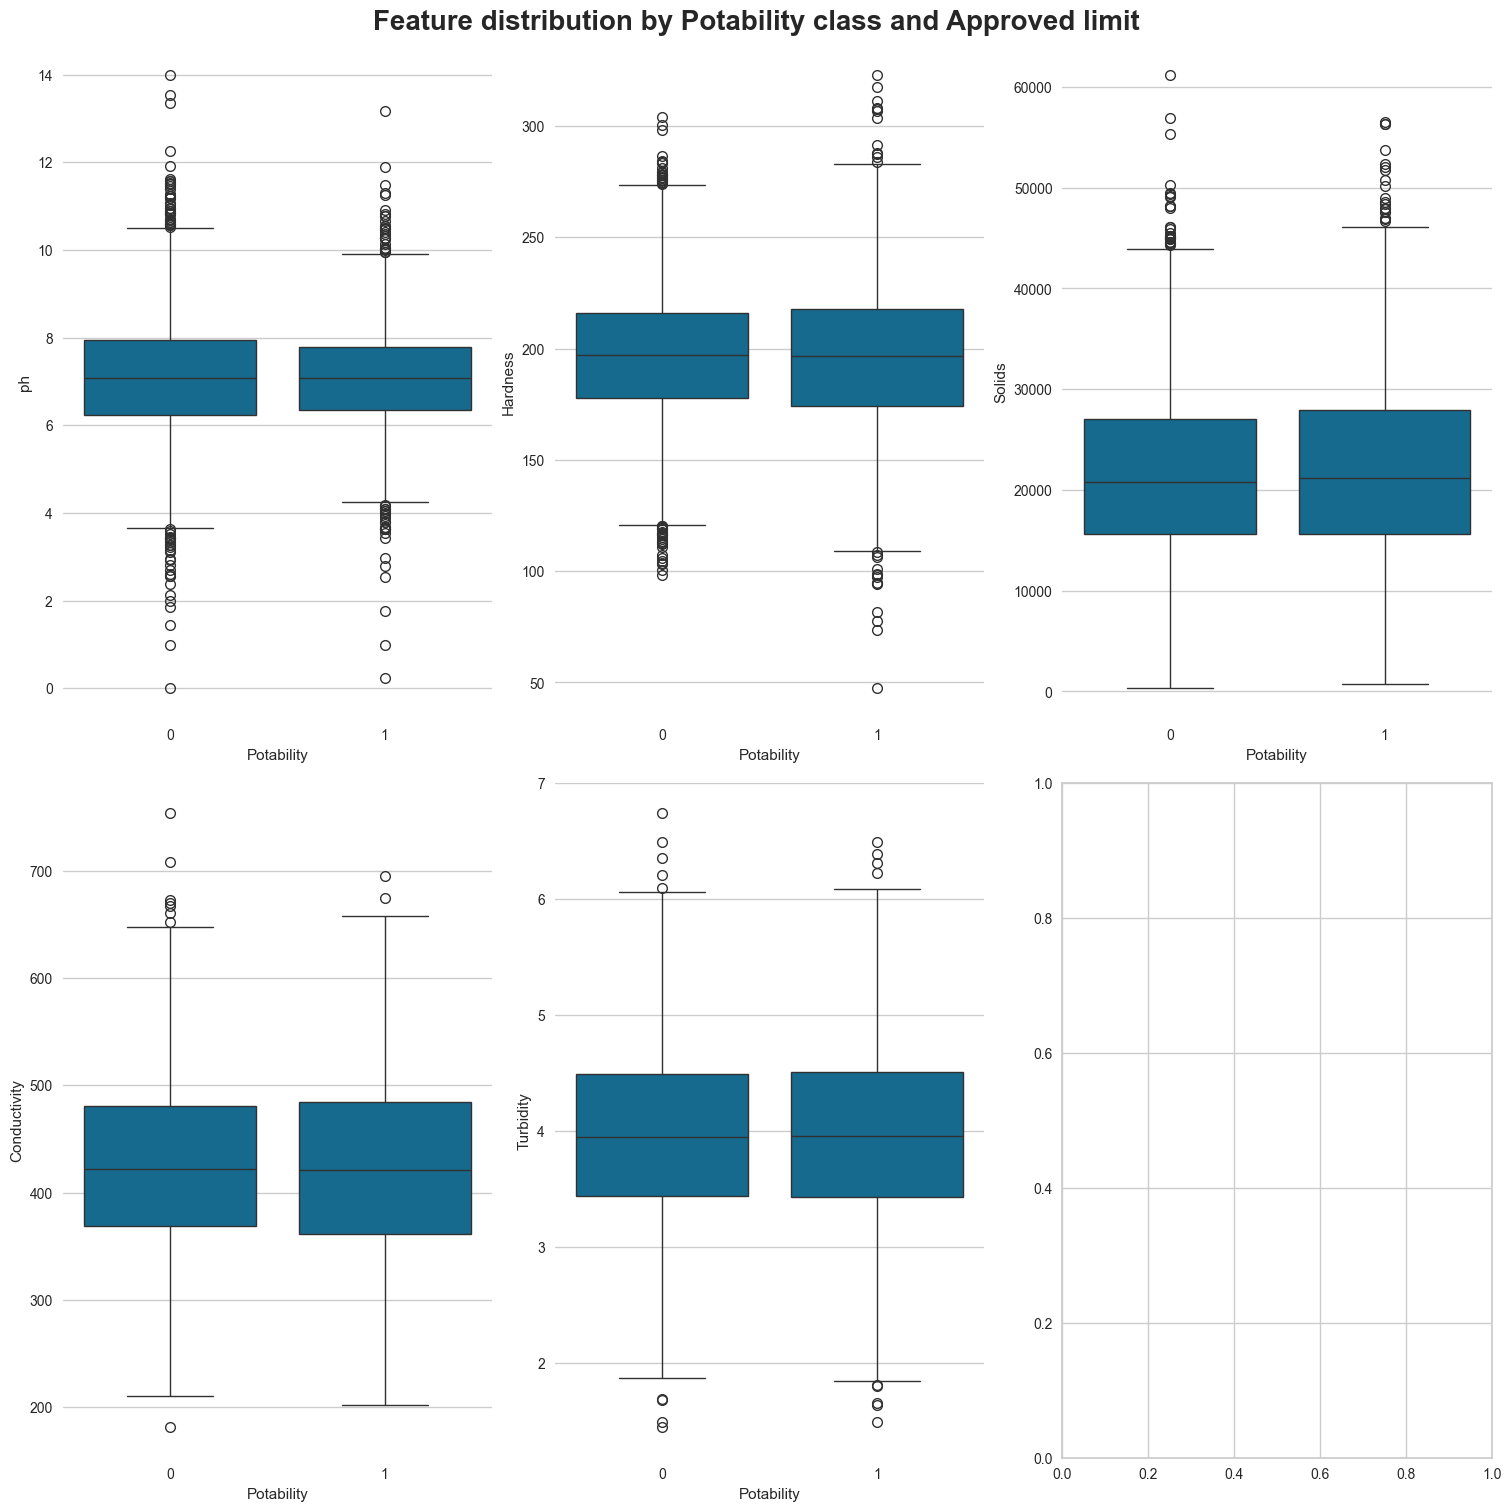

In [20]:
fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

There are outliers in the dataset, we need to handle the same. most feature means are looks similar and there are very less differnce in variance. as mentioned in the above observation, Hypothesis testing would be the right option to identify the singnificance.

### Hypothesis testing¶
Ho (Null Hypothesis) - Mean for both samples/group are same

H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.

Significant level - 90%

Alpha - 0.5% (ie., 0.1)

p_value for ph is 0.8257362194511633 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

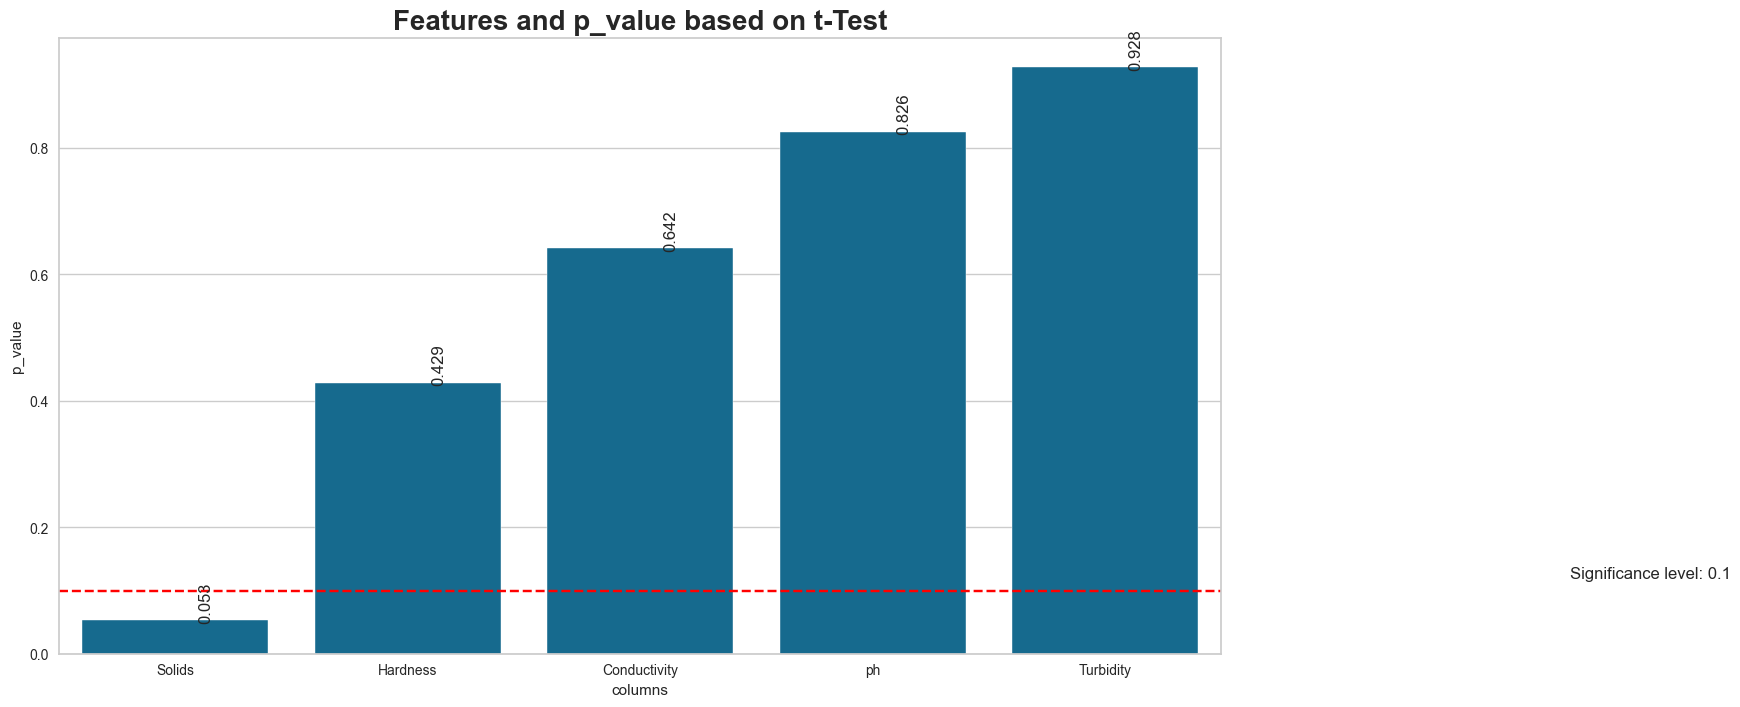

In [21]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

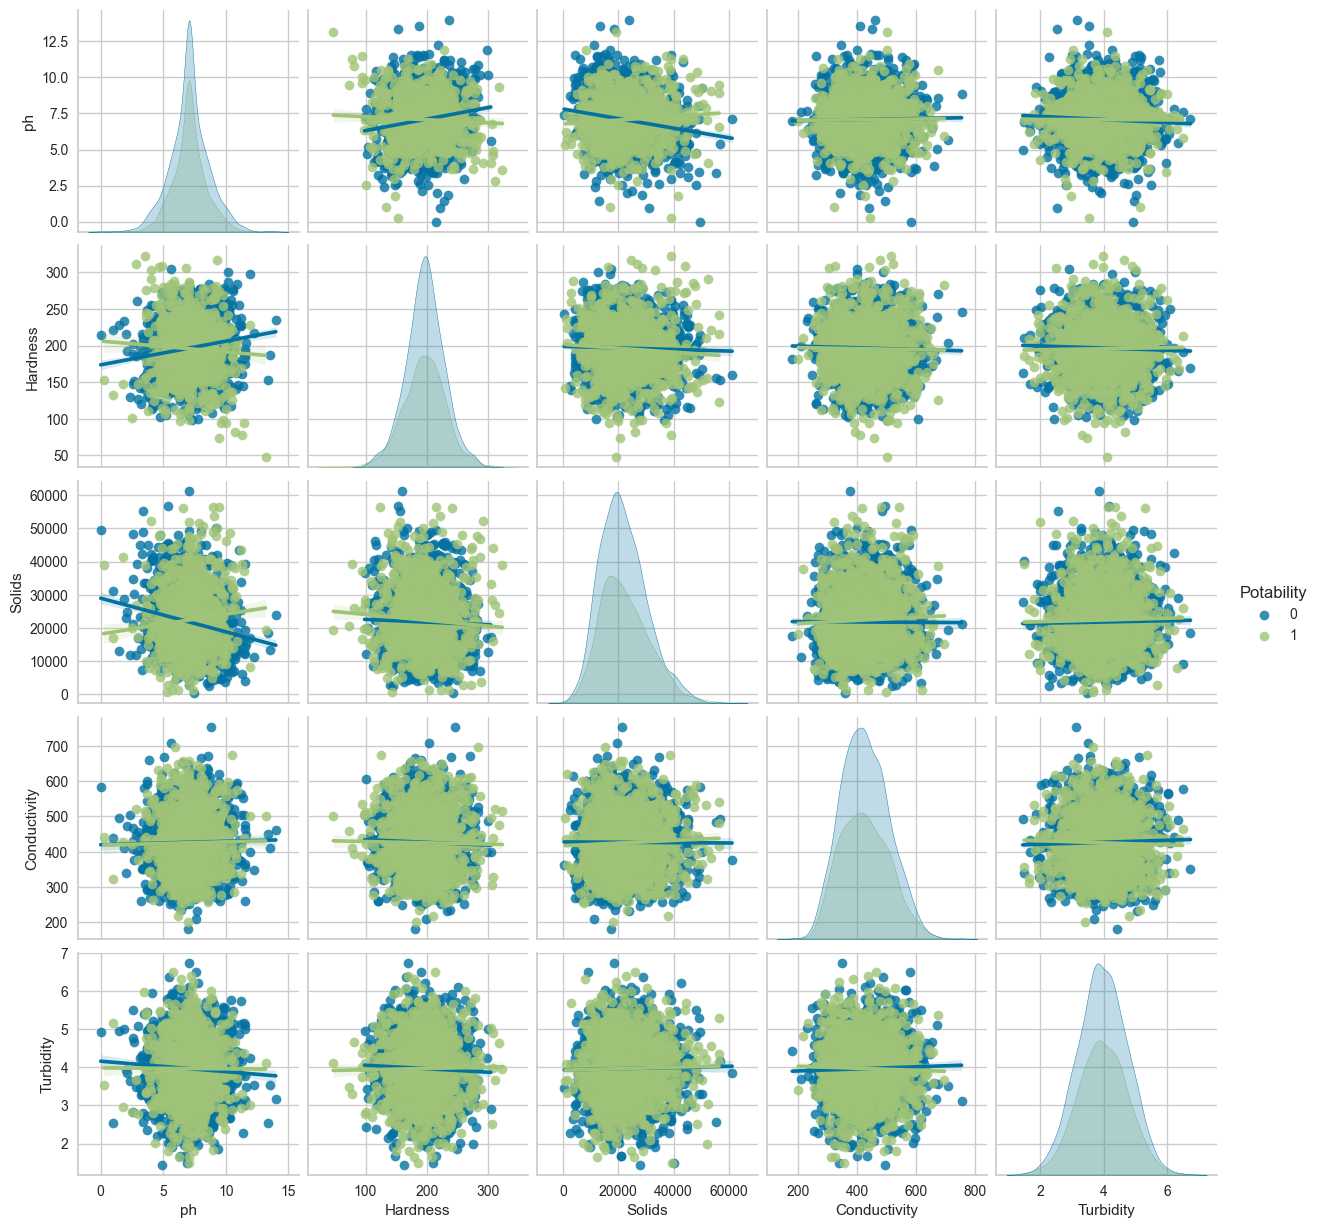

In [22]:
sns.pairplot(df, hue='Potability', kind='reg')

<Axes: >

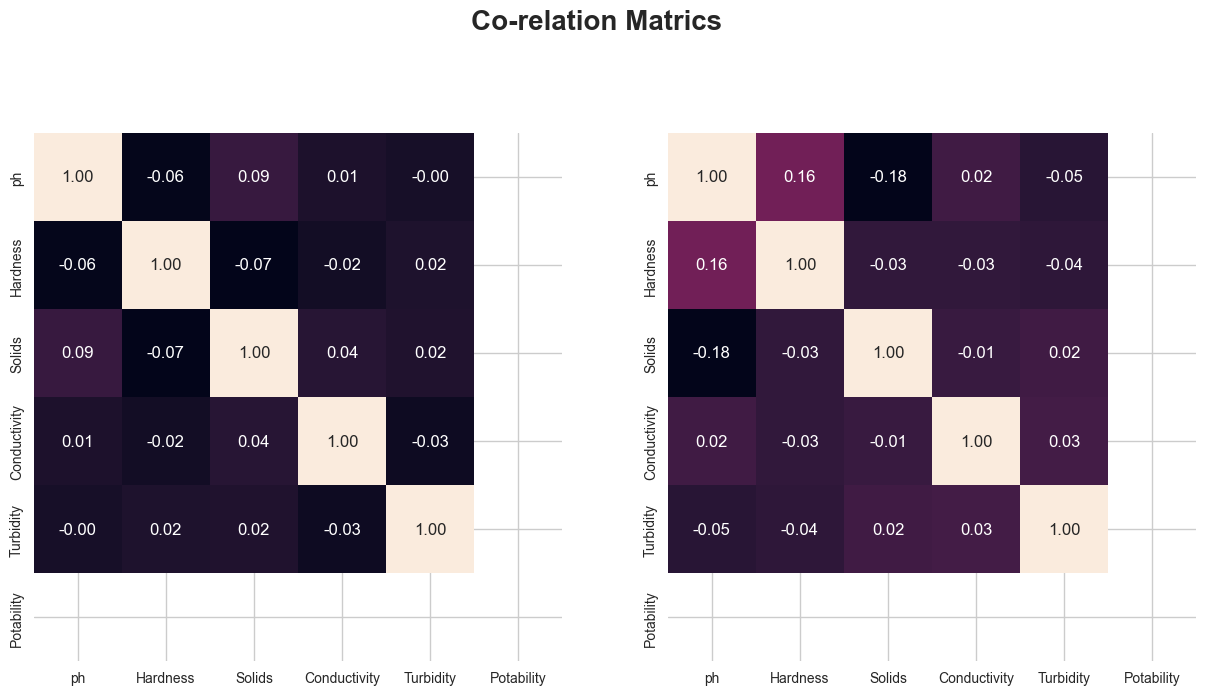

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<Axes: >

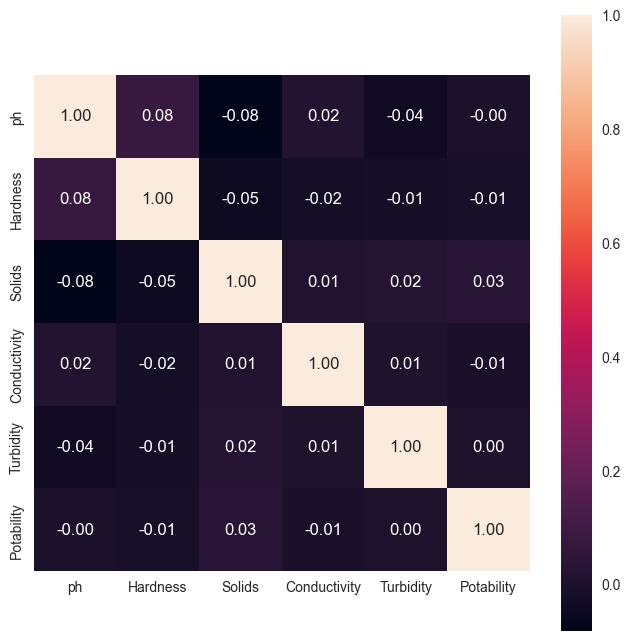

In [24]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.

PCA to check the explained variance

<Axes: >

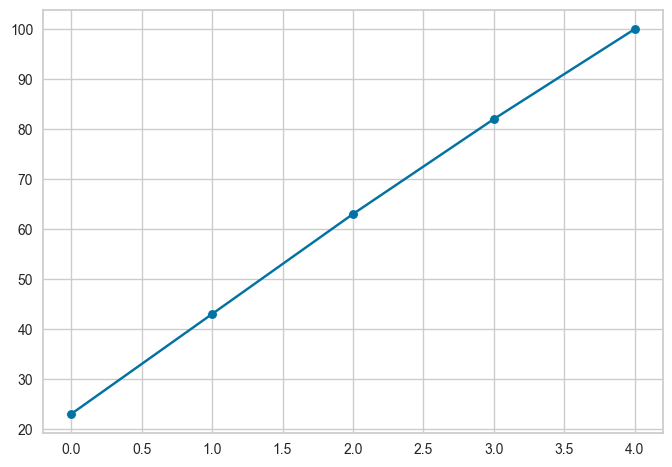

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

As mentioned above, all the feature are independent and doesn't share any linear relationship. we would need atleast 7 dimensions to explain 90% of the variations. so dimenstionality reduction doesn't make any change.

In [26]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [27]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.570239
5,KNeighborsClassifier(),0.605512
3,DecisionTreeClassifier(),0.612900
0,AdaBoostClassifier(),0.616261
2,GradientBoostingClassifier(),0.637092
1,BaggingClassifier(),0.645832


From the above basic modeling techinique, average cv score for GradientBoosting & BaggingClassifier is high compared to other models. so, let us try to do hyper tunning for these model to improve the accuracy

In [28]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 80} , Best Score : 0.6485155941571259
Best Estimator: {'n_estimators': 500} , Best Score : 0.6770825108566918


BaggingClassifier models gives slightly higher accuracy than the Gradientboosting model. further fine tuining could bring more accuracy score. I will stop here considering the computational time. lets try to predict the test dataset with best parameters from above cell and plot the confusion matrix and classification reports

              precision    recall  f1-score   support

           0       0.72      0.64      0.67       510
           1       0.49      0.59      0.54       309

    accuracy                           0.62       819
   macro avg       0.61      0.61      0.61       819
weighted avg       0.63      0.62      0.62       819



<Axes: >

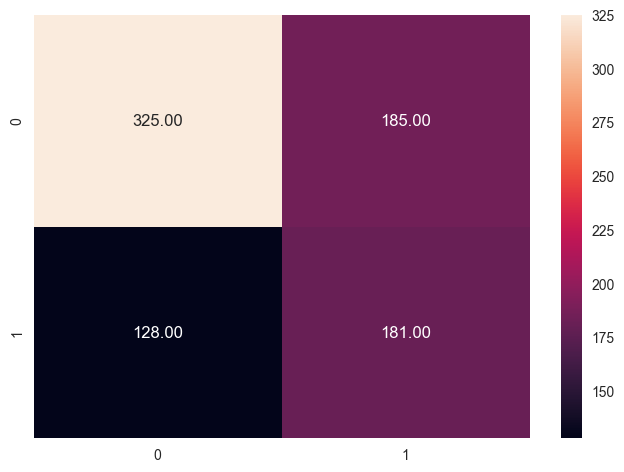

In [29]:
# GradientBoosting

from sklearn.metrics import classification_report, confusion_matrix
modelGBC = GradientBoostingClassifier(n_estimators=300)
modelGBC.fit(X_train,y_train)
pred = modelGBC.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


In [30]:
# BaggingClassifier

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       510
           1       0.53      0.56      0.54       309

    accuracy                           0.64       819
   macro avg       0.62      0.63      0.63       819
weighted avg       0.65      0.64      0.65       819



<Axes: >

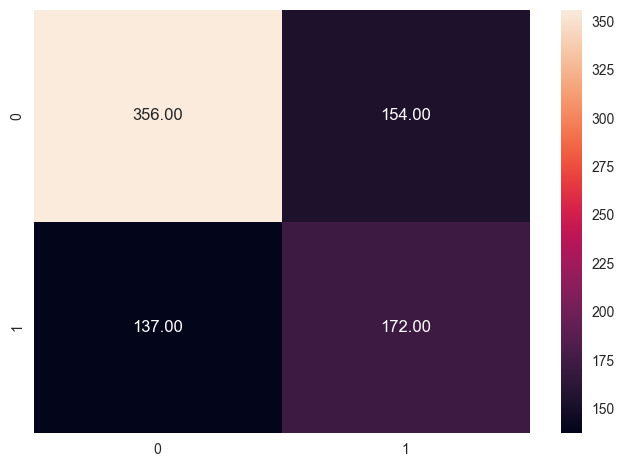

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
modelBC = BaggingClassifier(n_estimators=80)
modelBC.fit(X_train,y_train)
pred = modelBC.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [33]:
import pickle

In [34]:
with open("bagging_model.pkl", "wb") as f:
    pickle.dump(modelBC, f)

In [37]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scale, f)

In [1]:
x = [7.0,5.0,6.0,4.0,3.0]
import pickle

# load model
with open("bagging_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)



In [6]:
x_input = [[3, 12, 18630.057858, 592.885359, 4.500656]]

In [7]:
x_scaled = loaded_scaler.transform(x_input)
# use it to predict
prediction = loaded_model.predict(x_scaled)
print("Prediction:", prediction)

Prediction: [1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
test = pd.read_csv('/Users/lokeshchahar/Desktop/Hachathon/ideathon hackathon/dataset/water_potability.csv')
test = test.drop(['Chloramines', 'Sulfate','Organic_carbon','Trihalomethanes'], axis=1)
test[test['Potability']==1].head(3)

,ph,Hardness,Solids,Conductivity,Turbidity,Potability
250,9.445130,145.805402,13168.529156,592.659021,3.875165,1
251,9.024845,128.096691,19859.676476,451.143481,3.985251,1
252,NaN,169.974849,23403.637304,475.573562,2.747313,1


In [ ]:
x_input = [[9.44, 145.80, 13168.52, 592.65, 4.500656]]